Ссылка на github: https://github.com/stepanovdn/obuch_s_uchit

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Исследование-моделей-без-учёта-дисбаланса" data-toc-modified-id="Исследование-моделей-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование моделей без учёта дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.utils import shuffle
from tqdm import tqdm
import math
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import random
import numpy as np

In [226]:
df = pd.read_csv('./datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [228]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [229]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Пропусков в столбце пола нет.

In [230]:
df['Surname'].value_counts()

Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Wagner        1
Upchurch      1
Moroney       1
Hoelscher     1
Enriquez      1
Name: Surname, Length: 2932, dtype: int64

In [231]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

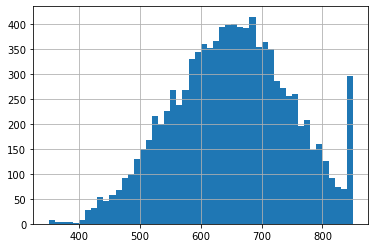

In [232]:
df['CreditScore'].hist(bins=50)

Из описания данных видно, что кредитный рейтинг считается в диапазоне от 350 до 850. Судя по графику есть чуть меньше 300 пользователей с максимальным кредитным рейтингом.

<AxesSubplot:>

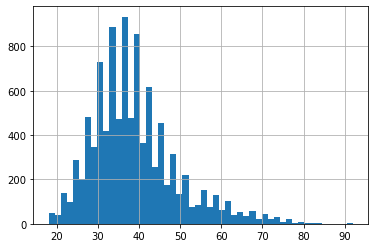

In [233]:
df['Age'].hist(bins=50)

Из описания данных возраст в диапазоне от 18 до 92.

In [234]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

В основном 1 или 2 продукта, 3 или 4 существенно реже.

In [235]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [236]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Нехочется из-за нехватки данных в одном столце 'Tenure' исключать другие данные об 909 клиентах. Возможно на то уйдёт ли клиент признак того сколько лет человек является клиентом банка влияет не самым значительным образом.

<AxesSubplot:>

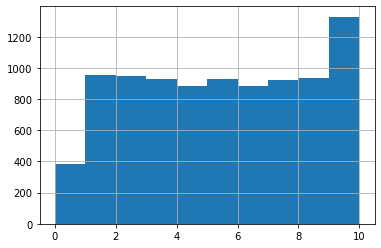

In [237]:
df['Tenure'].hist(bins=10)

In [238]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [239]:
df['Tenure'] = df['Tenure'].apply(lambda x: None if pd.isnull(x) else '{0:.0f}'.format(pd.to_numeric(x)))

In [240]:
df['Tenure'].unique()

array(['2', '1', '8', '7', '4', '6', '3', '10', '5', '9', '0', None],
      dtype=object)

In [241]:
df['Tenure'] = df['Tenure'].fillna(-1)
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'] = df['Tenure'].replace(-1, np.nan)

In [242]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [243]:
# Без этого результаты метрик различаются от запуска к запуску.
random.seed(42)

In [244]:
df['Tenure'] = df.Tenure.apply(lambda x: random.choice(range(0,11)) if np.isnan(x) else x)

In [245]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

<AxesSubplot:>

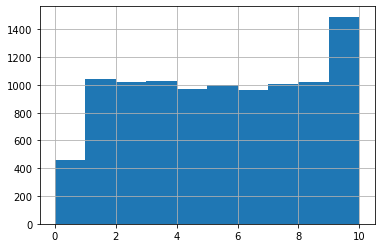

In [246]:
df['Tenure'].hist(bins=10)

In [247]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Исследование задачи

### Баланс классов

In [248]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Видим, что есть дисбаланс классов. Тех кто ушёл в 4 раза меньше чем тех, кто остался клиентом банка.

### Исследование моделей без учёта дисбаланса

Сомнительно, что фамилии и дентификаторы клиентов могут как-то влиять на отток, поэтому удалим столбец с фамилиями и идентификаторами.

In [249]:
features = df.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
features.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,2,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,3,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,4,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,5,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10


In [250]:
target = df['Exited']
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [251]:
features_ohe = pd.get_dummies(features, columns=['Geography','Gender'], drop_first=True)

In [252]:
features_ohe.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,2,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,3,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,4,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,5,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


Порядковым кодированием преобразовали значения признаков страны проживания и пола к числовым значениям.

Разобъем данные на три части в пропорции 60%(тренировочная) / 20%(валидационная) / 20%(тестовая):

In [253]:
features_train_temp, features_test, target_train_temp, target_test = train_test_split(
    features_ohe, target, test_size=0.2, random_state=12345, stratify=target)
features_train, features_val, target_train, target_val = train_test_split(
    features_train_temp, target_train_temp, test_size=0.25, random_state=12345, stratify=target_train_temp)

In [254]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_valid_scaled = scaler.transform(features_val) 

#### Логистическая регрессия

In [255]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_lr.fit(features_train_scaled, target_train)

model_lr.predict(features_val)

result = model_lr.score(features_valid_scaled, target_val)
print("Точность модели на валидационной выборке:", result)

Точность модели на валидационной выборке: 0.8175


In [256]:
predicted_valid_lr = model_lr.predict(features_valid_scaled)
f1_lr = f1_score(target_val, predicted_valid_lr)
f1_lr

0.3202979515828678

Метрика 0.3197 существенно ниже минимального целевого значения 0.59.

#### Решающее дерево

In [257]:
%%time

best_model_dt_val_0 = None
best_result_dt_val_0 = 0
best_max_features_dt_val_0 = 0
best_min_samples_leaf_dt_val_0 = 0
for depth_0 in tqdm(range(3, 6)):
    for max_features_0 in range(3, 10):
        for min_samples_leaf_0 in range(5, 30, 5):
            model_0 = DecisionTreeClassifier(max_depth=depth_0, random_state=12345,
                                          max_features = max_features_0, min_samples_leaf = min_samples_leaf_0)
            model_0.fit(features_train_scaled, target_train)
            result_0 = model_0.score(features_valid_scaled, target_val)
            if result_0 > best_result_dt_val_0:
                best_model_dt_val_0 = model_0
                best_result_dt_val_0 = result_0 
                best_max_features_dt_val_0 = max_features_0
                best_min_samples_leaf_dt_val_0 = min_samples_leaf_0
print("Точность лучшей модели на валидационной выборке:", best_result_dt_val_0)
print("Глубина лучшей модели на валидационной выборке:", best_model_dt_val_0.tree_.max_depth)  
print("Лучшее максимальное количество признаков на валидационной выборке:", best_max_features_dt_val_0)
print("Лучшее минимальное число объектов в листе на валидационной выборке:", best_min_samples_leaf_dt_val_0)

100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

Точность лучшей модели на валидационной выборке: 0.8525
Глубина лучшей модели на валидационной выборке: 5
Лучшее максимальное количество признаков на валидационной выборке: 7
Лучшее минимальное число объектов в листе на валидационной выборке: 25
Wall time: 663 ms


In [258]:
predicted_valid_0 = best_model_dt_val_0.predict(features_valid_scaled)
f1_0 = f1_score(target_val, predicted_valid_0)
f1_0

0.541213063763608

In [259]:
probabilities_valid_0 = best_model_dt_val_0.predict_proba(features_valid_scaled)
probabilities_one_valid_0 = probabilities_valid_0[:, 1]

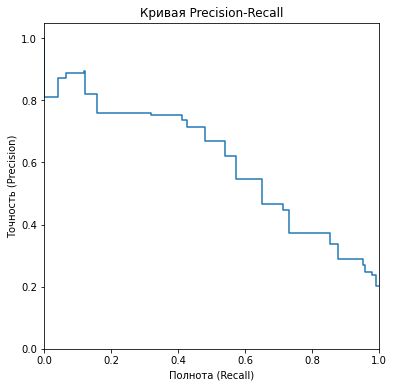

In [260]:
precision_0, recall_0, thresholds_0 = precision_recall_curve(target_val, probabilities_valid_0[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_0, precision_0, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

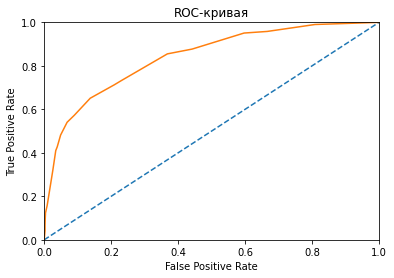

In [261]:
fpr_0, tpr_0, thresholds_0 = roc_curve(target_val, probabilities_one_valid_0)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr_0, tpr_0)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [262]:
auc_roc = roc_auc_score(target_val, probabilities_one_valid_0)
auc_roc

0.8399755687891282

Значение метрики f1_score 0.5412 < 0.59 недостаточное, попробуем случайный лес.

#### Случайный лес

In [263]:
%%time

best_model_rf_val = None
best_result_rf_val = 0
best_est_rf_val = 0
best_max_depth_val = 0
best_max_features_rf_val = 0
best_min_samples_leaf_rf_val = 0
best_min_samples_split_rf_val = 0
for est in tqdm(range(20, 40, 5)):
    for depth in range(3, 6):
        for max_features in range(3, 7):
            for min_samples_leaf in range(5, 25, 5):
                for min_samples_split in range(5, 25, 5):
                    model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth,
                                                  max_features = max_features, min_samples_leaf = min_samples_leaf,
                                                  min_samples_split = min_samples_split) 
                    model.fit(features_train_scaled, target_train) 
                    result = model.score(features_valid_scaled, target_val) 
                    if result > best_result_rf_val:
                        best_model_rf_val = model
                        best_result_rf_val = result
                        best_est_rf_val = est
                        best_max_depth_val = depth
                        best_max_features_rf_val = max_features
                        best_min_samples_leaf_rf_val = min_samples_leaf
                        best_min_samples_split_rf_val = min_samples_split

print("Точность наилучшей модели на валидационной выборке:", best_result_rf_val)
print("Количество деревьев в модели на валидационной выборке:", best_est_rf_val)
print("Глубина лучшей модели на валидационной выборке:", best_max_depth_val) 
print("Лучшее максимальное количество признаков на валидационной выборке:", best_max_features_rf_val)
print("Лучшее минимальное число объектов в листе на валидационной выборке:", best_min_samples_leaf_rf_val)
print("The minimum number of samples required to split an internal node:", best_min_samples_split_rf_val)

100%|██████████| 4/4 [01:18<00:00, 19.64s/it]

Точность наилучшей модели на валидационной выборке: 0.8595
Количество деревьев в модели на валидационной выборке: 35
Глубина лучшей модели на валидационной выборке: 5
Лучшее максимальное количество признаков на валидационной выборке: 5
Лучшее минимальное число объектов в листе на валидационной выборке: 20
The minimum number of samples required to split an internal node: 5
Wall time: 1min 18s


In [264]:
predicted_valid = best_model_rf_val.predict(features_valid_scaled)
f1 = f1_score(target_val, predicted_valid)
f1

0.5339966832504146

In [265]:
probabilities_valid = best_model_rf_val.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

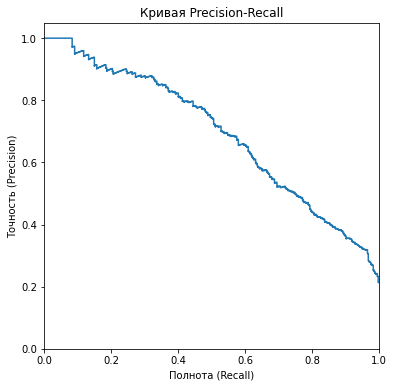

In [266]:
precision, recall, thresholds = precision_recall_curve(target_val, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Видим, что при большей точности, уменьшается полнота и наоборот при большей полноте уменьшается точность.  
График Precision-Recall более плавный чем у одного дерева решений.

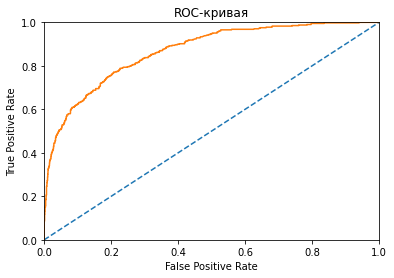

In [267]:
fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_valid)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [268]:
auc_roc = roc_auc_score(target_val, probabilities_one_valid)
auc_roc

0.8680282748079359

#### Выводы

* Линейная регрессия даёт недостаточные результаты:
 * accuracy = 0.817, f1 = 0.3197
* Просто решающее дерево с перебором гиперпараметров даёт метрики: 
 * accuracy = 0.8525, f1 = 0.5412, auc_roc = 0.8399
* Для случайного леса с перебором гиперпараметров получили результаты лучше, но всё ещё ниже минимального целевого показателя в 0.59: 
 * accuracy = 0.8595, f1 = 0.5339, auc_roc = 0.868


Поработаем с дисбалансом классов, чтобы улучшить качество модели. Значения всех метрик лучше у случайного леса, поэтому его и используем для при дальнейшем улучшении модели.

## Борьба с дисбалансом

### Взвешивание классов

Используем сбалансированную стратегию для работы с весами классов - зададим в классификаторе class_weight ='balanced'. 

In [269]:
%%time

best_model_rf_val_1 = None
best_result_rf_val_1 = 0
best_est_rf_val_1 = 0
best_max_depth_val_1 = 0
best_max_features_rf_val_1 = 0
best_min_samples_leaf_rf_val_1 = 0
best_min_samples_split_rf_val_1 = 0
for est_1 in tqdm(range(20, 40, 5)):
    for depth_1 in range(3, 6):
        for max_features_1 in range(3, 7):
            for min_samples_leaf_1 in range(5, 25, 5):
                for min_samples_split_1 in range(5, 25, 5):
                    model_1 = RandomForestClassifier(random_state=12345, n_estimators=est_1, max_depth = depth_1,
                                                  max_features = max_features_1, min_samples_leaf = min_samples_leaf_1, 
                                                  min_samples_split = min_samples_split_1, class_weight ='balanced') 
                    model_1.fit(features_train_scaled, target_train) 
                    result_1 = model_1.score(features_valid_scaled, target_val) 
                    if result_1 > best_result_rf_val_1:
                        best_model_rf_val_1 = model_1
                        best_result_rf_val_1 = result_1
                        best_est_rf_val_1 = est_1
                        best_max_depth_val_1 = depth_1
                        best_max_features_rf_val_1 = max_features_1
                        best_min_samples_leaf_rf_val_1 = min_samples_leaf_1
                        best_min_samples_split_rf_val_1 = min_samples_split_1

print("Точность наилучшей модели на валидационной выборке:", best_result_rf_val_1)
print("Количество деревьев в модели на валидационной выборке:", best_est_rf_val_1)
print("Глубина лучшей модели на валидационной выборке:", best_max_depth_val_1) 
print("Лучшее максимальное количество признаков на валидационной выборке:", best_max_features_rf_val_1)
print("Лучшее минимальное число объектов в листе на валидационной выборке:", best_min_samples_leaf_rf_val_1)
print("The minimum number of samples required to split an internal node:", best_min_samples_split_rf_val_1)

100%|██████████| 4/4 [01:20<00:00, 20.24s/it]

Точность наилучшей модели на валидационной выборке: 0.8105
Количество деревьев в модели на валидационной выборке: 30
Глубина лучшей модели на валидационной выборке: 5
Лучшее максимальное количество признаков на валидационной выборке: 4
Лучшее минимальное число объектов в листе на валидационной выборке: 10
The minimum number of samples required to split an internal node: 5
Wall time: 1min 20s


In [270]:
predicted_valid_1 = best_model_rf_val_1.predict(features_valid_scaled)
f1_1 = f1_score(target_val, predicted_valid_1)
f1_1

0.6175580221997982

In [271]:
probabilities_valid_1 = best_model_rf_val_1.predict_proba(features_valid_scaled)
probabilities_one_valid_1 = probabilities_valid_1[:, 1]

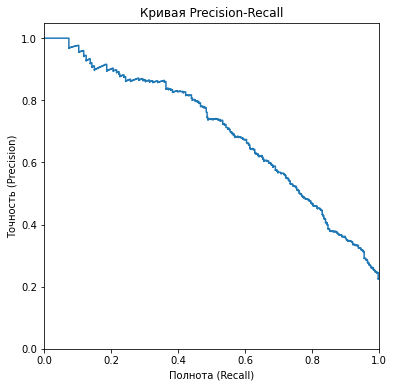

In [272]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(target_val, probabilities_valid_1[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_1, precision_1, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

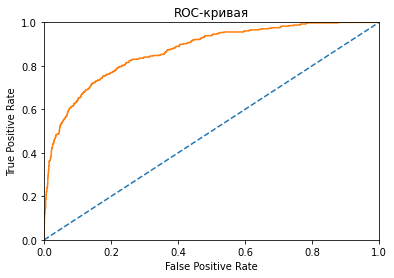

In [273]:
fpr1, tpr1, thresholds1 = roc_curve(target_val, probabilities_one_valid_1)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr1, tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [274]:
auc_roc = roc_auc_score(target_val, probabilities_one_valid_1)
auc_roc

0.8701883701883701

Чем оранжевый график выше, тем больше значение TPR и лучше качество модели.

При взвешивании классов для случайного леса получили:
* accuracy = 0.8105
* f1_score = 0.6175
* auc_roc = 0.8701 

Целевой показатель f1_score в 0.6175 > 0.59 на валидационной выборке достигнут.

### Увеличение выборки

In [275]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)

    return features_upsampled, target_upsampled

In [276]:
target_train.value_counts()

0    4777
1    1223
Name: Exited, dtype: int64

In [277]:
features_train.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5536,5537,636,45,10.0,0.00,2,1,1,159463.80,0,1,1
8530,8531,808,33,2.0,103516.87,1,1,0,113907.80,0,0,0
1762,1763,758,34,1.0,154139.45,1,1,1,60728.89,0,0,0
9090,9091,809,39,5.0,0.00,1,1,0,77705.75,0,0,0
8777,8778,603,24,1.0,165149.13,2,1,0,21858.28,0,1,1


In [278]:
target_train.head()

5536    0
8530    0
1762    0
9090    0
8777    0
Name: Exited, dtype: int64

In [279]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4) 

In [280]:
target_train_upsampled.value_counts()

1    4892
0    4777
Name: Exited, dtype: int64

In [281]:
features_train_upsampled_scaled = scaler.transform(features_train_upsampled)
features_valid_scaled = scaler.transform(features_val) 

In [282]:
%%time

best_model_rf_val_2 = None
best_result_rf_val_2 = 0
best_est_rf_val_2 = 0
best_max_depth_val_2 = 0
best_max_features_rf_val_2 = 0
best_min_samples_leaf_rf_val_2 = 0
best_min_samples_split_rf_val_2 = 0
for est_2 in tqdm(range(20, 40, 5)):
    for depth_2 in range(3, 6):
        for max_features_2 in range(3, 7):
            for min_samples_leaf_2 in range(5, 25, 5):
                for min_samples_split_2 in range(5, 25, 5):
                    model_2 = RandomForestClassifier(random_state=12345, n_estimators=est_2, max_depth = depth_2,
                                                  max_features = max_features_2, min_samples_leaf = min_samples_leaf_2,
                                                  min_samples_split = min_samples_split_2) 
                    model_2.fit(features_train_upsampled_scaled, target_train_upsampled) 
                    result_2 = model_2.score(features_valid_scaled, target_val) 
                    if result_2 > best_result_rf_val_2:
                        best_model_rf_val_2 = model_2
                        best_result_rf_val_2 = result_2
                        best_est_rf_val_2 = est_2
                        best_max_depth_val_2 = depth_2
                        best_max_features_rf_val_2 = max_features_2
                        best_min_samples_leaf_rf_val_2 = min_samples_leaf_2
                        best_min_samples_split_rf_val_2 = min_samples_split_2

print("Точность наилучшей модели на валидационной выборке:", best_result_rf_val_2)
print("Количество деревьев в модели на валидационной выборке:", best_est_rf_val_2)
print("Глубина лучшей модели на валидационной выборке:", best_max_depth_val_2) 
print("Лучшее максимальное количество признаков на валидационной выборке:", best_max_features_rf_val_2)
print("Лучшее минимальное число объектов в листе на валидационной выборке:", best_min_samples_leaf_rf_val_2)
print("The minimum number of samples required to split an internal node:", best_min_samples_split_rf_val_2)

100%|██████████| 4/4 [01:54<00:00, 28.74s/it]

Точность наилучшей модели на валидационной выборке: 0.809
Количество деревьев в модели на валидационной выборке: 20
Глубина лучшей модели на валидационной выборке: 5
Лучшее максимальное количество признаков на валидационной выборке: 4
Лучшее минимальное число объектов в листе на валидационной выборке: 20
The minimum number of samples required to split an internal node: 5
Wall time: 1min 54s


In [283]:
predicted_valid_2 = best_model_rf_val_2.predict(features_valid_scaled)
f1_2 = f1_score(target_val, predicted_valid_2)
f1_2

0.618

In [284]:
probabilities_valid_2 = best_model_rf_val_2.predict_proba(features_valid_scaled)
probabilities_one_valid_2 = probabilities_valid_2[:, 1]

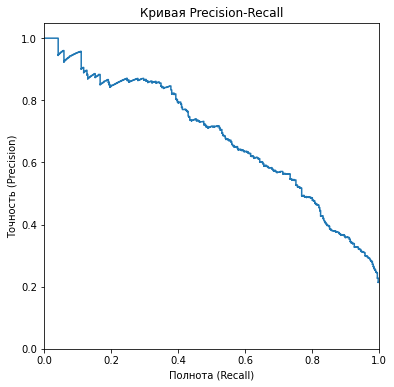

In [285]:
precision_2, recall_2, thresholds_2 = precision_recall_curve(target_val, probabilities_valid_2[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_2, precision_2, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

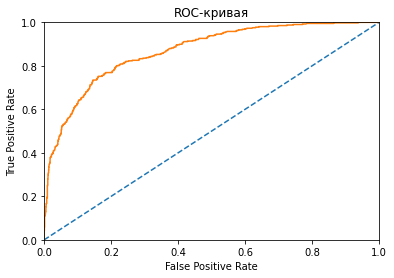

In [286]:
fpr2, tpr2, thresholds2 = roc_curve(target_val, probabilities_one_valid_2)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [287]:
auc_roc = roc_auc_score(target_val, probabilities_one_valid_2)
auc_roc

0.8690940555347335

При взвешивании классов получили:
* accuracy = 0.809
* f1_score = 0.618
* auc_roc = 0.8690

Целевой показатель f1_score в 0.618 > 0.59 на валидационной выборке достигнут.

### Уменьшение выборки

In [288]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [289]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.255)

In [290]:
target_train_downsampled.value_counts()

1    1223
0    1218
Name: Exited, dtype: int64

In [291]:
features_train_downsampled_scaled = scaler.transform(features_train_downsampled) 

In [292]:
%%time

best_model_rf_val_3 = None
best_result_rf_val_3 = 0
best_est_rf_val_3 = 0
best_max_depth_val_3 = 0
best_max_features_rf_val_3 = 0
best_min_samples_leaf_rf_val_3 = 0
best_min_samples_split_rf_val_3 = 0
for est_3 in tqdm(range(20, 40, 5)):
    for depth_3 in range(3, 6):
        for max_features_3 in range(3, 7):
            for min_samples_leaf_3 in range(5, 25, 5):
                for min_samples_split_3 in range(5, 25, 5):
                    model_3 = RandomForestClassifier(random_state=12345, n_estimators=est_3, max_depth = depth_3,
                                                  max_features = max_features_3, min_samples_leaf = min_samples_leaf_3,
                                                  min_samples_split = min_samples_split_3) 
                    model_3.fit(features_train_downsampled_scaled, target_train_downsampled) 
                    result_3 = model_3.score(features_valid_scaled, target_val) 
                    if result_3 > best_result_rf_val_3:
                        best_model_rf_val_3 = model_3
                        best_result_rf_val_3 = result_3
                        best_est_rf_val_3 = est_3
                        best_max_depth_val_3 = depth_3
                        best_max_features_rf_val_3 = max_features_3
                        best_min_samples_leaf_rf_val_3 = min_samples_leaf_3
                        best_min_samples_split_rf_val_3 = min_samples_split_3

print("Точность наилучшей модели на валидационной выборке:", best_result_rf_val_3)
print("Количество деревьев в модели на валидационной выборке:", best_est_rf_val_3)
print("Глубина лучшей модели на валидационной выборке:", best_max_depth_val_3) 
print("Лучшее максимальное количество признаков на валидационной выборке:", best_max_features_rf_val_3)
print("Лучшее минимальное число объектов в листе на валидационной выборке:", best_min_samples_leaf_rf_val_3)
print("The minimum number of samples required to split an internal node:", best_min_samples_split_rf_val_3)

100%|██████████| 4/4 [00:47<00:00, 11.76s/it]

Точность наилучшей модели на валидационной выборке: 0.812
Количество деревьев в модели на валидационной выборке: 20
Глубина лучшей модели на валидационной выборке: 3
Лучшее максимальное количество признаков на валидационной выборке: 4
Лучшее минимальное число объектов в листе на валидационной выборке: 15
The minimum number of samples required to split an internal node: 5
Wall time: 47.1 s


In [293]:
predicted_valid_3 = best_model_rf_val_3.predict(features_valid_scaled)
f1 = f1_score(target_val, predicted_valid_3)
f1

0.5965665236051502

In [294]:
probabilities_valid_3 = best_model_rf_val_3.predict_proba(features_valid_scaled)
probabilities_one_valid_3 = probabilities_valid_3[:, 1]

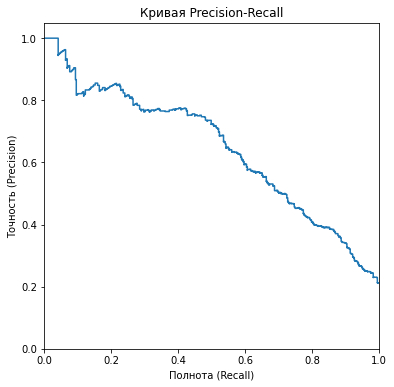

In [295]:
precision_3, recall_3, thresholds_3 = precision_recall_curve(target_val, probabilities_valid_3[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_3, precision_3, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

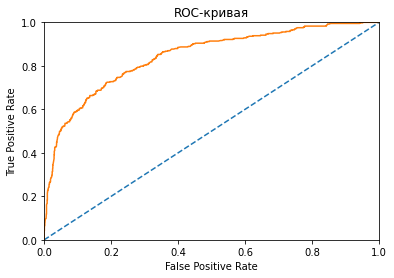

In [296]:
fpr3, tpr3, thresholds3 = roc_curve(target_val, probabilities_one_valid_3)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr3, tpr3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [297]:
auc_roc = roc_auc_score(target_val, probabilities_one_valid_3)
auc_roc

0.8441877933403357

При уменьшении выборки:
* accuracy = 0.812
* f1_score = 0.5965
* auc_roc = 0.8441 

Целевой показатель f1_score в 0.5965 > 0.59 на валидационной выборке достигнут.

### Выводы

Итого для модели со случайным лесом:
* наилучшие метрики удалось получить при использовании взвешивания классов: 
 * accuracy =  0.8105, f1_score = 0.6175, auc_roc = 0.8701
* увеличение выборки дубликатами показало результаты: 
 * accuracy = 0.809, f1_score = 0.618, auc_roc = 0.8690
* уменьшение выборки дало результаты: 
 * accuracy = 0.812, f1_score = 0.5965, auc_roc = 0.8441

Для тестирования выберем модель со случайным лесом со взвешиванием классов.

## Тестирование модели

В feature_train_temp, target_train_temp были данные, которые делились на тренировочную и валидационную выборки. Обучим лучшую модель на совокупности тренировочных и валидационных данных.

In [298]:
target_train_temp.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [299]:
features_train_temp_scaled = scaler.transform(features_train_temp)

In [300]:
best_model_rf_val_1.fit(features_train_temp_scaled, target_train_temp)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=4,
                       min_samples_leaf=10, min_samples_split=5,
                       n_estimators=30, random_state=12345)

In [301]:
features_test_scaled = scaler.transform(features_test) 

In [302]:
predicted_test = best_model_rf_val_1.predict(features_test_scaled)

print("Точность на тестовой выборке для случайного леса:", accuracy_score(target_test, predicted_test)) 

Точность на тестовой выборке для случайного леса: 0.811


In [303]:
f1_4 = f1_score(target_test, predicted_test)
f1_4

0.6227544910179641

На тестовой выборке получили значение метрики f1_score 0.6156 больше минимального целевого показателя 0.59.

In [304]:
probabilities_test_4 = best_model_rf_val_1.predict_proba(features_test_scaled)
probabilities_one_test_4 = probabilities_test_4[:, 1]

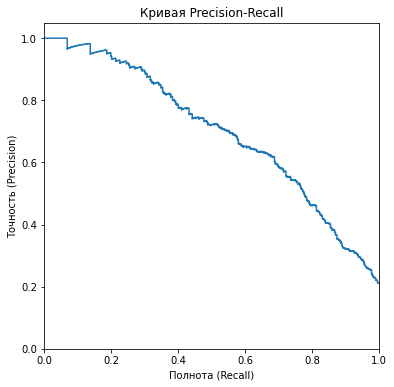

In [305]:
precision_4, recall_4, thresholds_4 = precision_recall_curve(target_test, probabilities_test_4[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_4, precision_4, where='post')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

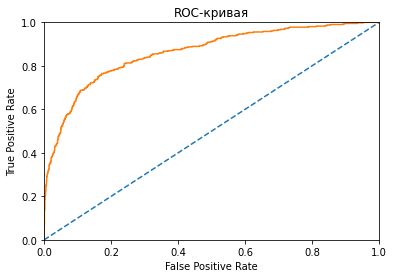

In [306]:
fpr4, tpr4, thresholds4 = roc_curve(target_test, probabilities_one_test_4)

plt.figure()

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr4, tpr4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Чем график выше, тем больше значение TPR и лучше качество модели.

In [307]:
auc_roc = roc_auc_score(target_test, probabilities_one_test_4)
auc_roc

0.8618950229119722

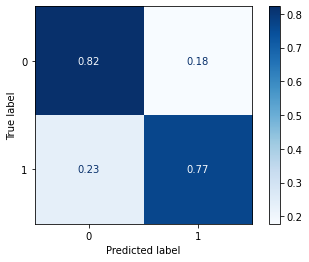

In [308]:
plot_confusion_matrix(estimator=best_model_rf_val_1, X=features_test_scaled, y_true=target_test,
                      normalize='true', cmap='Blues')

Модель со случайным лесом со взвешиванием классов с гиперпараметрами
* class_weight='balanced'
* n_estimators=20
* max_depth=5
* max_features=4
* min_samples_leaf=10

должна предсказывать:
* в 82% случаев, что клиент может перестать быть клиентом банка
* в 77% случаев, что клиент останется клиентом банка
* в 23% случаев с ошибкой, что клиент останется клиентом банка, в то время как на самом деле клиент может перестать быть клиентом банка
* в 18% случаев с ошибкой, что клиент перестанет быть клиентом банка, в то время как на самом деле клиент останется клиентом банка   

Клиентам, для которых модель предсказала, что они могут перестать быть клиентам банка можно сделать какие-нибудь выгодные предложения, чтобы попытаться удержать этих клиентов.

На тех 18% клиентов, для которых модель ошибочно прогнозирует уход из банка, банк на предложениях выгодных условий будет терять деньги, поэтому имеет смысл искать способы уменьшить эту ошибку.

Те 23% клиентов, для которых модель ошибочно спрогнозирует, что они останутся клиентами банка - этим клиентам не будет своевременного сделаны выгодные предложения и банк может этих клиентов потерять. Эту ошибку тоже имеет смысл уменьшать, чтобы уменьшить количество потерянных клиентов. 

На тестовой выборке получены значения метрик f1 = 0.6227 и auc_roc = 0.8618.

In [309]:
importances = best_model_rf_val_1.feature_importances_  
feature_list = list(features_test.columns)  
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})  
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)  
feature_results.head(20) 

,feature,importance
0,Age,0.413059
1,NumOfProducts,0.312615
2,IsActiveMember,0.082462
3,Balance,0.067757
4,Geography_Germany,0.066125
5,Gender_Male,0.024676
6,CreditScore,0.010742
7,EstimatedSalary,0.010460
8,RowNumber,0.006715
9,Tenure,0.003091


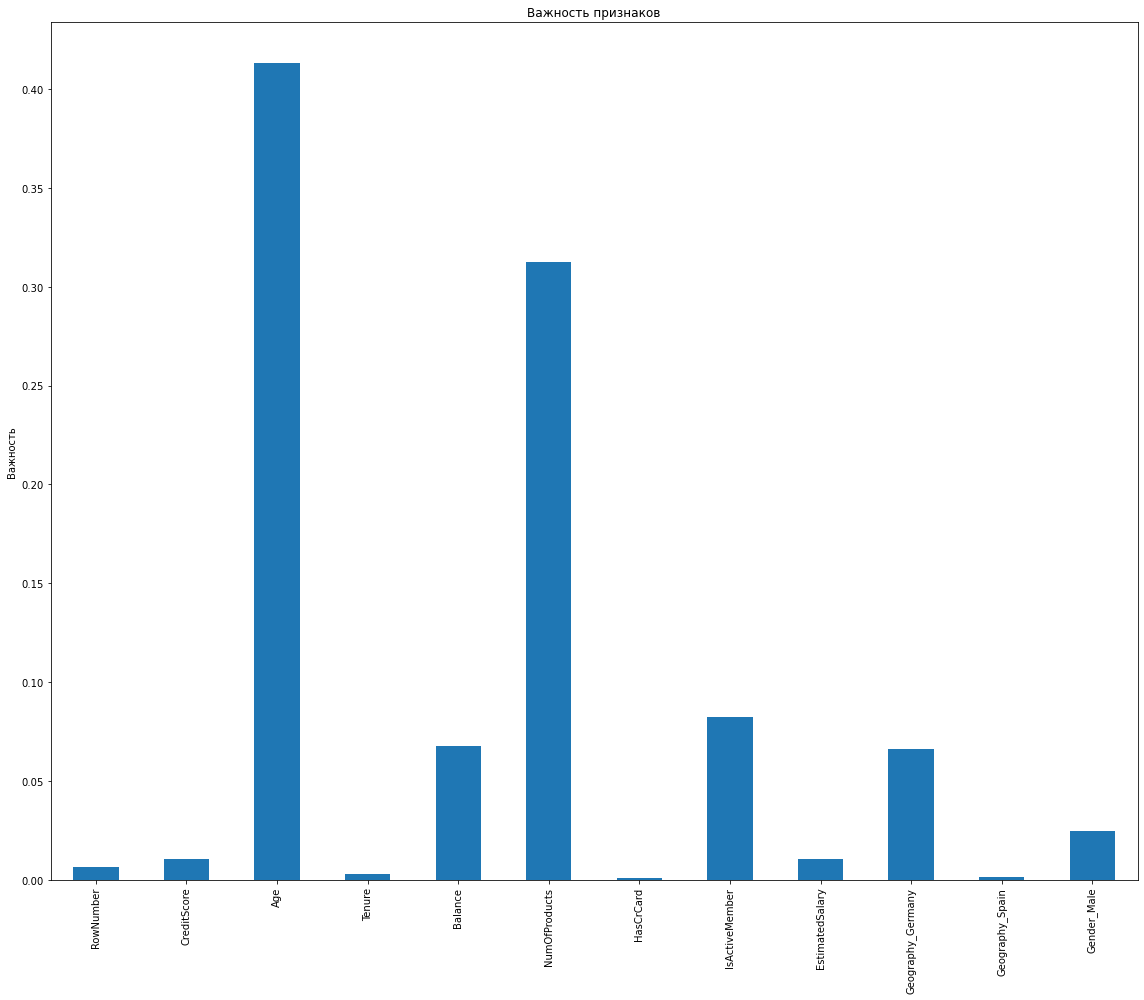

In [310]:
skl_iris_imp = pd.Series(best_model_rf_val_1.feature_importances_,
                         features_test.columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Больше всего влияют признаки: 
* возраст 41.24% 
* количество используемых продуктов 33.2%
* является ли пользователь активным 10.79%
* страна проживания 5.54%
* баланс на счетё 5.45%

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*